In [1]:
# https://www.hackerrank.com/challenges/battery/problem

# !/bin/python3

import math
import os
import random
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("input.txt", sep=",")
labels = ["ChargeTime", "BatteryTime"]
df.columns = labels

In [3]:
df.head()

,ChargeTime,BatteryTime
0,7.14,8.00
1,2.72,5.44
2,3.87,7.74
3,1.90,3.80
4,7.82,8.00


In [4]:
df.shape

(99, 2)

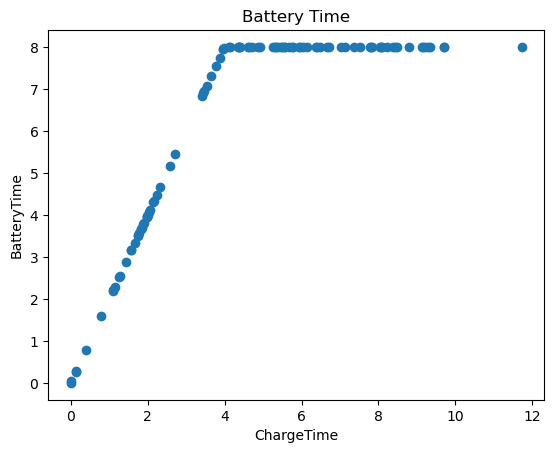

In [5]:
plt.scatter(df["ChargeTime"], df["BatteryTime"])
plt.title("Battery Time")
plt.ylabel("BatteryTime")
plt.xlabel("ChargeTime")
plt.show()

In [6]:
import tensorflow as tf
import copy

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.98*len(df)), int(0.99*len(df))])

In [8]:
print(train)

    ChargeTime  BatteryTime
12        0.14         0.28
2         3.87         7.74
91        5.77         8.00
43        4.15         8.00
18        0.00         0.00
..         ...          ...
77        5.96         8.00
75        0.13         0.26
76        1.44         2.88
40        5.94         8.00
86        3.99         7.98

[97 rows x 2 columns]


In [9]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values # Take all the columns' values
  else: # Labels are passed into the function
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1) # Reshape to make it 2D, since only one column
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1) # reshape to be able to stack with the X matrix
  data = np.hstack((X,y))

  return data, X, y

In [10]:
_, X_train, y_train = get_xy(train, "BatteryTime", x_labels = ["ChargeTime"]) 
_, X_valid, y_valid = get_xy(valid, "BatteryTime", x_labels = ["ChargeTime"])
_, X_test, y_test = get_xy(test, "BatteryTime", x_labels = ["ChargeTime"])

In [11]:
print(X_train)

[[ 0.14]
 [ 3.87]
 [ 5.77]
 [ 4.15]
 [ 0.  ]
 [ 3.97]
 [ 6.05]
 [ 6.39]
 [ 6.13]
 [ 2.33]
 [ 8.38]
 [ 4.93]
 [ 4.35]
 [ 8.06]
 [ 5.33]
 [ 4.64]
 [ 7.53]
 [ 8.49]
 [ 4.38]
 [ 4.37]
 [ 9.33]
 [ 1.58]
 [ 1.26]
 [ 0.02]
 [ 5.31]
 [ 5.58]
 [ 2.  ]
 [ 7.79]
 [ 2.58]
 [ 5.55]
 [ 6.48]
 [ 3.45]
 [ 1.98]
 [ 1.78]
 [ 3.47]
 [ 9.13]
 [ 7.02]
 [ 1.99]
 [ 3.97]
 [ 1.9 ]
 [ 1.76]
 [ 8.43]
 [ 2.24]
 [ 1.27]
 [ 1.58]
 [ 3.53]
 [ 4.11]
 [ 5.26]
 [ 1.89]
 [ 6.65]
 [ 2.15]
 [ 9.2 ]
 [ 1.75]
 [ 8.08]
 [ 9.15]
 [ 3.65]
 [ 9.69]
 [ 8.05]
 [ 1.83]
 [ 2.16]
 [ 4.61]
 [ 5.68]
 [ 2.72]
 [ 0.8 ]
 [ 8.21]
 [ 7.8 ]
 [ 1.85]
 [ 3.42]
 [ 4.87]
 [ 8.79]
 [ 6.37]
 [ 7.37]
 [ 5.39]
 [ 1.1 ]
 [ 1.11]
 [ 1.98]
 [ 4.71]
 [ 2.04]
 [ 4.39]
 [ 9.71]
 [ 1.83]
 [ 1.66]
 [ 7.82]
 [ 6.71]
 [ 5.75]
 [ 3.77]
 [ 5.5 ]
 [ 5.47]
 [ 1.14]
 [11.72]
 [ 7.14]
 [ 2.06]
 [ 5.96]
 [ 0.13]
 [ 1.44]
 [ 5.94]
 [ 3.99]]


In [12]:
normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
normalizer.adapt(X_train.reshape(-1,1))

nn_model = tf.keras.Sequential([ # Use a real neural network
    normalizer, # Normalized input data 
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu') # Output layer ->
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [13]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    verbose=0, epochs=500
)

4/4 [==============================] - 0s 2ms/step


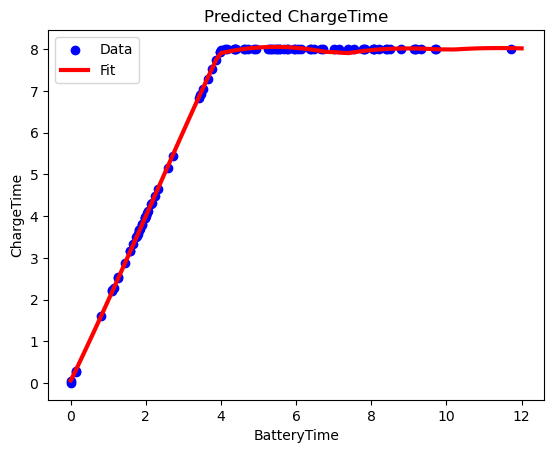

In [14]:
plt.scatter(X_train, y_train, label='Data', color='blue')
x = tf.linspace(0, 12, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3) # Change model to NN model, otherwise keep the same
plt.legend()
plt.title("Predicted ChargeTime")
plt.ylabel("ChargeTime")
plt.xlabel("BatteryTime")
plt.show()

In [ ]:
def plot_loss(history):

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch') # An epoch is a training cycle
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
plot_loss(history)

In [ ]:
x_input = pd.DataFrame(np.array([0.2]))
y_pred = nn_model.predict(x_input)

In [ ]:
print(y_pred[0][0])

2.343544
4.69
